##### Copyright 2024 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Prompting Quickstart

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb"><img src="../images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

This notebook contains examples of how to write and run your first prompts with the Gemini API.

In [ ]:
!pip install -U -q "google-generativeai>=0.7.2" # Install the Python SDK

In [ ]:
import google.generativeai as genai

## Set up your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) quickstart for an example.

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Run your first prompt

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to generate_content, and use the `.text` property to get the text content of the response.

In [2]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content("Give me python code to sort a list")
print(response.text)

```python
# Using the built-in sort() method
my_list = [5, 2, 8, 1, 9]
my_list.sort()
print(my_list)  # Output: [1, 2, 5, 8, 9]

# Using the sorted() function (returns a new sorted list)
my_list = [5, 2, 8, 1, 9]
sorted_list = sorted(my_list)
print(sorted_list)  # Output: [1, 2, 5, 8, 9]
print(my_list)  # Output: [5, 2, 8, 1, 9] (original list remains unchanged)

# Sorting in descending order
my_list = [5, 2, 8, 1, 9]
my_list.sort(reverse=True)
print(my_list)  # Output: [9, 8, 5, 2, 1]

# Sorting a list of tuples based on the second element
my_list = [(1, 5), (3, 2), (2, 8)]
my_list.sort(key=lambda x: x[1])
print(my_list)  # Output: [(3, 2), (1, 5), (2, 8)]
```

**Explanation:**

* **`my_list.sort()`:** This method sorts the list in place (modifies the original list).
* **`sorted(my_list)`:** This function returns a new sorted list without modifying the original list.
* **`reverse=True`:**  This argument to the `sort()` method sorts the list in descending order.
* **`key=lambda x: x[1]

## Use images in your prompt

Here you will download an image from a URL and pass that image in our prompt.

First, you download the image and load it with PIL:

In [3]:
!curl -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0  7591k      0 --:--:-- --:--:-- --:--:-- 7591k


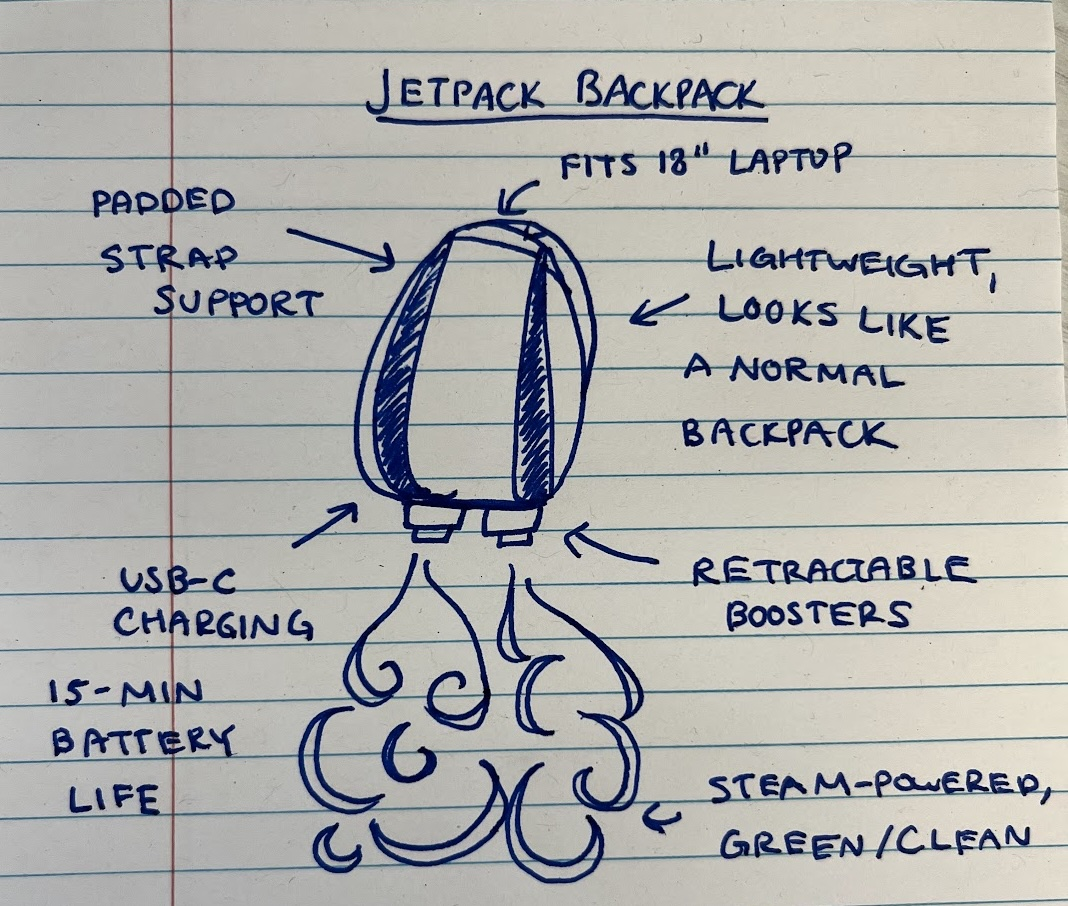

In [4]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [5]:
prompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

Then you can include the image in our prompt by just passing a list of items to `generate_content`.

In [6]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content([prompt, img])
print(response.text)

```json
{
 "description": "The Jetpack Backpack is a backpack that looks like a normal backpack but has retractable boosters that allow the wearer to fly. It has a padded strap support, fits a 18 inch laptop, and has a USB-C charging port with 15-minute battery life. The boosters are steam-powered and green/clean.",
 "features": [
  "Looks like a normal backpack",
  "Padded strap support",
  "Fits 18\" laptop",
  "Retractable boosters",
  "USB-C charging",
  "15-minute battery life",
  "Steam-powered",
  "Green/clean"
 ]
}
```


## Have a chat

The Gemini API enables you to have freeform conversations across multiple turns.

The [ChatSession](https://ai.google.dev/api/python/google/generativeai/ChatSession) class will store the conversation history for multi-turn interactions.

In [7]:
model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])

In [8]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
print(response.text)

A computer is like a super smart toy that follows instructions from you, using numbers and lights to do amazing things! 



You can see the chat history:

In [9]:
print(chat.history)

[parts {
  text: "In one sentence, explain how a computer works to a young child."
}
role: "user"
, parts {
  text: "A computer is like a super smart toy that follows instructions from you, using numbers and lights to do amazing things! \n"
}
role: "model"
]


You can keep sending messages to continue the conversation:

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?")
print(response.text)

## Set the temperature

Every prompt you send to the model includes parameters that control how the model generates responses. Use a `genai.GenerationConfig` to set these, or omit it to use the defaults.

Temperature controls the degree of randomness in token selection. Use higher values for more creative responses, and lower values for more deterministic responses.

You can set the `generation_config` when creating the model.

In [ ]:
model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(
        max_output_tokens=2000,
        temperature=0.9,
    ))

Or, set the `generation_config` on an individual call to `generate_content`. Any values set there override values on the model constructor.

Note: Although you can set the `candidate_count` in the generation_config, gemini-pro models will only return a single candidate at the this time.

In [ ]:
response = model.generate_content(
    'Give me a numbered list of cat facts.',
    # Limit to 5 facts.
    generation_config = genai.GenerationConfig(stop_sequences=['\n6'])
)

In [ ]:
print(response.text)

## Learn more

There's lots more to learn!

* For more fun prompts, check out [Market a Jetpack](https://github.com/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb).
* Check out the [safety quickstart](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Safety.ipynb) next to learn about the Gemini API's configurable safety settings, and what to do if your prompt is blocked.
* For lots more details on using the Python SDK, check out this [detailed quickstart](https://ai.google.dev/tutorials/python_quickstart).